# Credit Card Default Model 3 - Xgboost - Utkarsh

# Read Dataset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("D:/Credit Card Default iNeuron Internship/Dataset/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df1 = df.drop(labels=['ID'],axis=1)

In [4]:
df1['SEX']=df['SEX'].astype(str)
df1['EDUCATION']=df['EDUCATION'].astype(str)
df1['MARRIAGE']=df['MARRIAGE'].astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  object 
 2   EDUCATION                   30000 non-null  object 
 3   MARRIAGE                    30000 non-null  object 
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

# Defining X and Y

In [5]:
X = df1.drop(labels=['default.payment.next.month'],axis=1)
Y = df1[['default.payment.next.month']]

In [6]:
from definitions import catcon
cat, con = catcon(X)

Categorical and Continuous variables appended


In [7]:
X1 = X[con]
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)
Xnew.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24,2,2,-1,-1,-2,-2,3913.0,3102.0,...,0,1,0,0,0,0,0,1,0,0
1,120000.0,26,-1,2,0,0,0,2,2682.0,1725.0,...,0,1,0,0,0,0,0,0,1,0
2,90000.0,34,0,0,0,0,0,0,29239.0,14027.0,...,0,1,0,0,0,0,0,0,1,0
3,50000.0,37,0,0,0,0,0,0,46990.0,48233.0,...,0,1,0,0,0,0,0,1,0,0
4,50000.0,57,-1,0,-1,0,0,0,8617.0,5670.0,...,0,1,0,0,0,0,0,1,0,0


# Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# XGBoost Base Model

In [9]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=300,learning_rate=0.01)
model.fit(xtrain, ytrain, 
           eval_set=[(xtest, ytest)],
           verbose=True)

[0]	validation_0-logloss:0.68859
[1]	validation_0-logloss:0.68412
[2]	validation_0-logloss:0.67974
[3]	validation_0-logloss:0.67545
[4]	validation_0-logloss:0.67124
[5]	validation_0-logloss:0.66711
[6]	validation_0-logloss:0.66307
[7]	validation_0-logloss:0.65910
[8]	validation_0-logloss:0.65521
[9]	validation_0-logloss:0.65139
[10]	validation_0-logloss:0.64766
[11]	validation_0-logloss:0.64399
[12]	validation_0-logloss:0.64040
[13]	validation_0-logloss:0.63688
[14]	validation_0-logloss:0.63343
[15]	validation_0-logloss:0.63004
[16]	validation_0-logloss:0.62671
[17]	validation_0-logloss:0.62345
[18]	validation_0-logloss:0.62026
[19]	validation_0-logloss:0.61711
[20]	validation_0-logloss:0.61402
[21]	validation_0-logloss:0.61101
[22]	validation_0-logloss:0.60803
[23]	validation_0-logloss:0.60511
[24]	validation_0-logloss:0.60225
[25]	validation_0-logloss:0.59944
[26]	validation_0-logloss:0.59667
[27]	validation_0-logloss:0.59396
[28]	validation_0-logloss:0.59130
[29]	validation_0-loglos

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=300,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [10]:
#Predictions
tr_pred = model.predict(xtrain) 
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc = accuracy_score(ytrain,tr_pred)
ts_acc = accuracy_score(ytest,ts_pred)
tr_rec = recall_score(ytrain,tr_pred)
ts_rec = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc,4))
print('Testing Accuracy  : ',round(ts_acc,4))
print('Training Recall   : ',round(tr_rec,4))
print('Testing Recall    : ',round(ts_rec,4))

Training Accuracy :  0.8372
Testing Accuracy  :  0.8205
Training Recall   :  0.3972
Testing Recall    :  0.3618


<AxesSubplot: >

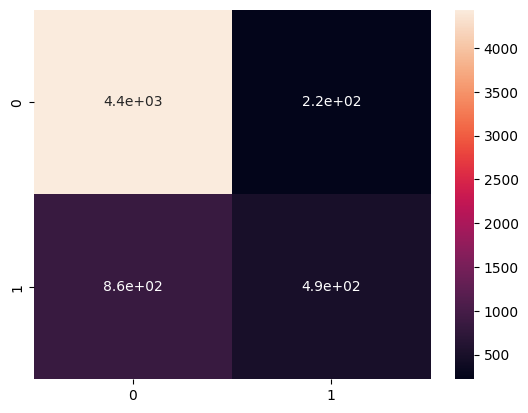

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
cf = confusion_matrix(ytest,ts_pred)
sb.heatmap(cf,annot=True)

# Model 3.1 with GridsearchCV 

In [12]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=300,learning_rate=0.01)
tg = {"max_depth":range(2,20)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(xgb,tg,scoring='accuracy',cv=4,verbose=1)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

Fitting 4 folds for each of 18 candidates, totalling 72 fits


{'max_depth': 4}

In [13]:
xgb = XGBClassifier(n_estimators=500,learning_rate=0.01,max_depth=4)
model31 = xgb.fit(xtrain, ytrain, 
                  eval_set=[(xtest, ytest)],
                  verbose=True)

[0]	validation_0-logloss:0.68867
[1]	validation_0-logloss:0.68427
[2]	validation_0-logloss:0.67996
[3]	validation_0-logloss:0.67574
[4]	validation_0-logloss:0.67160
[5]	validation_0-logloss:0.66754
[6]	validation_0-logloss:0.66356
[7]	validation_0-logloss:0.65965
[8]	validation_0-logloss:0.65583
[9]	validation_0-logloss:0.65207
[10]	validation_0-logloss:0.64839
[11]	validation_0-logloss:0.64478
[12]	validation_0-logloss:0.64124
[13]	validation_0-logloss:0.63776
[14]	validation_0-logloss:0.63435
[15]	validation_0-logloss:0.63100
[16]	validation_0-logloss:0.62771
[17]	validation_0-logloss:0.62449
[18]	validation_0-logloss:0.62133
[19]	validation_0-logloss:0.61822
[20]	validation_0-logloss:0.61517
[21]	validation_0-logloss:0.61218
[22]	validation_0-logloss:0.60924
[23]	validation_0-logloss:0.60636
[24]	validation_0-logloss:0.60352
[25]	validation_0-logloss:0.60075
[26]	validation_0-logloss:0.59801
[27]	validation_0-logloss:0.59534
[28]	validation_0-logloss:0.59270
[29]	validation_0-loglos

In [14]:
tr_pred = model31.predict(xtrain) 
ts_pred = model31.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc31 = accuracy_score(ytrain,tr_pred)
ts_acc31 = accuracy_score(ytest,ts_pred)
tr_rec31 = recall_score(ytrain,tr_pred)
ts_rec31 = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc31,4))
print('Testing Accuracy  : ',round(ts_acc31,4))
print('Training Recall   : ',round(tr_rec31,4))
print('Testing Recall    : ',round(ts_rec31,4))

Training Accuracy :  0.8263
Testing Accuracy  :  0.823
Training Recall   :  0.3641
Testing Recall    :  0.3626


In [15]:
from sklearn.metrics import classification_report
clrep = classification_report(ytest,ts_pred)
print(clrep)

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4654
           1       0.71      0.36      0.48      1346

    accuracy                           0.82      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.82      0.80      6000



<AxesSubplot: >

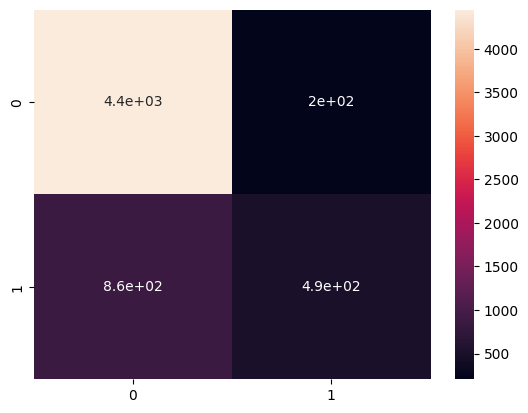

In [16]:
from sklearn.metrics import confusion_matrix
cf3 = confusion_matrix(ytest,ts_pred)
sb.heatmap(cf3,annot=True)

In [17]:
q = pd.DataFrame({'imp':model31.feature_importances_})
q.index = Xnew.columns

In [18]:
q = q.sort_values(by='imp',ascending=False)
q

,imp
PAY_0,0.398379
PAY_2,0.131281
PAY_3,0.051726
PAY_AMT2,0.035720
PAY_4,0.034091
PAY_5,0.032460
PAY_AMT3,0.026483
PAY_6,0.021959
BILL_AMT1,0.020837
PAY_AMT1,0.020476


<AxesSubplot: >

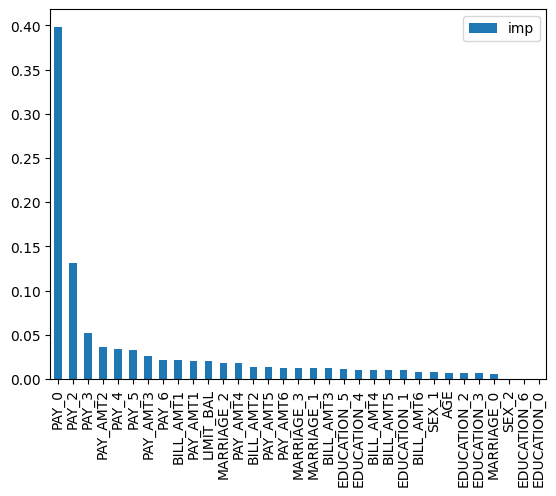

In [19]:
q.plot(kind='bar')

# Saving Pickle File

In [20]:
import pickle
with open('./Models/xgbmodel.pkl', 'wb') as files:
    pickle.dump(model31, files)

In [21]:
list(Xnew.columns)

['LIMIT_BAL',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'SEX_1',
 'SEX_2',
 'EDUCATION_0',
 'EDUCATION_1',
 'EDUCATION_2',
 'EDUCATION_3',
 'EDUCATION_4',
 'EDUCATION_5',
 'EDUCATION_6',
 'MARRIAGE_0',
 'MARRIAGE_1',
 'MARRIAGE_2',
 'MARRIAGE_3']

In [22]:
len(Xnew.columns)

33

In [26]:
import numpy as np
dfcheck = pd.DataFrame(np.zeros(33)).T
dfcheck.columns=Xnew.columns
dfcheck

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
dfcheck['LIMIT_BAL']=232
dfcheck


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
